In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from collections import Counter

# Adeoti Temiloluwa,303008

##  Data PreProcessing
- wine quality data is read and stored in variable `winred`

In [4]:
winred  = pd.read_csv("winered.csv", delimiter = ";")
win_y = winred["quality"]
win_X = winred.drop(columns = ['quality'])
print(f"Dataset has {len(win_X.columns)} features")

Dataset has 11 features


In [5]:
win_X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


- function `standardize_features` standardizes the dataset 
- Function `train_test_split` performs train-test split on a dataset in ration 80:20
- The function is used to generate train-test split for the dataset 

In [6]:
standardize_features = lambda x: (x - x.mean()) / x.std()
normalize_features  = lambda x: (x - x.min()) / (x.max() - x.min())

def train_test_split(x_data,y_data):
    np.random.seed(5)
    a = np.arange(len(x_data))
    np.random.shuffle(a)
    split = int(len(x_data)*0.7)
    X_train, X_test, y_train, y_test = x_data.iloc[a[:split],:],\
                                    x_data.iloc[a[split:],:],\
                                    y_data.iloc[a[:split]],\
                                    y_data.iloc[a[split:]]
    assert(len(X_train) + len(X_test) == len(x_data))
    assert(len(y_train) + len(y_test) == len(y_data))
    return X_train, X_test, y_train, y_test

win_X = normalize_features(win_X)
Xtrain, Xtest, ytrain, ytest = train_test_split(win_X,win_y)

print(f"Shape of Xtrain : {Xtrain.shape}")
print(f"Shape of Xtest  : {Xtest.shape}")
print(f"Shape of ytrain : {ytrain.shape}")
print(f"Shape of Xtest  : {ytest.shape}")

if type(Xtrain) == type(winred):
    Xtrain = Xtrain.values
    Xtest  = Xtest.values
    ytrain = ytrain.values
    ytest  = ytest.values

Shape of Xtrain : (1119, 11)
Shape of Xtest  : (480, 11)
Shape of ytrain : (1119,)
Shape of Xtest  : (480,)


## Q1 K-Nearest Neighbors

In [9]:
model = KNN(120)
model.fit(Xtrain,Xtest)

NameError: name 'KNN' is not defined

In [10]:
model.accuracy(ytrain,ytest)

NameError: name 'model' is not defined

In [ ]:
model.rmse(ytrain,ytest)

## Q2 Model Validation

In [11]:
klist        = [5,10,50,100,150,200]
print(f"klist {klist}")
k_model_rmse = []
for k in klist:
    model = KNN(k)
    model.fit(Xtrain,Xtest)
    k_model_rmse.append(model.rmse(ytrain,ytest))
    plt.plot(k_model_rmse)
    

klist [5, 10, 50, 100, 150, 200]


NameError: name 'KNN' is not defined

In [12]:
def euclid(matrix_a,vector_b):
    return np.sqrt(np.sum((matrix_a - vector_b)**2, axis = 1))
    

def KNNeighbors(X,y,Xt,yt,k):
    neighbors = []
    for i in range(len(Xt)):
        distances = list(enumerate(euclid(X,Xt[i])))
        #print("before sorting",distances)
        distances.sort(key = lambda tup: tup[1])
        #print("after sorting",distances)
        neighbors.append(distances[:k])
    return neighbors

def predict_accuracy(X,y,Xt,yt,neighbors):
    prediction = np.empty((len(Xt),1))
    
    for i in range(len(Xt)):
        predlist = []
        for ind,_ in neighbors[i]:  
            predlist.append(y[ind])
            pred = Counter(predlist).most_common(1)[0][0]
            prediction[i] = pred
    
    return np.mean(prediction == yt)

def predict_rmse(X,y,Xt,yt,neighbors):
    
    prediction = np.empty((len(Xt),1))
    
    for i in range(len(Xt)):
        predlist = []
        for ind,_ in neighbors[i]:  
            predlist.append(y[ind])
            pred = np.mean(np.array(predlist))
            prediction[i] = pred
            
    return np.sqrt(np.mean((yt - prediction)**2))
    

In [13]:
n = KNNeighbors(Xtrain,ytrain,Xtest,ytest,k = 120)

In [14]:
predict_rmse(Xtrain,ytrain,Xtest,ytest,n)

0.8592333216546404

In [19]:
krmselist = []
for k in [5,10,50,100,300,350,500,750,1000]:
    n = KNNeighbors(Xtrain,ytrain,Xtest,ytest,k)
    krmses = predict_rmse(Xtrain,ytrain,Xtest,ytest,n)
    krmselist.append(krmses)
    

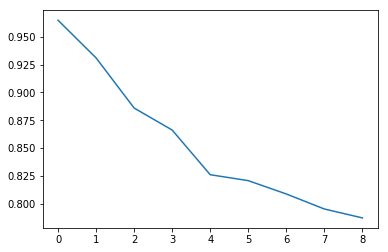

In [20]:
plt.plot(krmselist)

### plt.plot(k_model_rmse)
plt.xtics()

In [2]:
map(str,klist)

NameError: name 'klist' is not defined

In [3]:
klist

NameError: name 'klist' is not defined